In [294]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

# Download and load MTA turnstile data

In [2]:
def all_saturdays(start_date, end_date):
    modified_end_date = datetime.datetime.strptime(end_date,'%m/%d/%Y')+ datetime.timedelta(weeks = 1)
    saturday_list = pd.date_range(start =start_date, end =modified_end_date,
                              freq='W-SAT').strftime('%m/%d/%Y').tolist()
    return saturday_list

In [3]:
def import_mta(date):
    formatted_date = date[-2:]+date[:2]+date[3:5]
    base_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    date_url = base_url.format(formatted_date)
    date_data = pd.read_csv(date_url)
    return date_data

In [4]:
def mta_to_df(saturday_list):
    dict_of_dfs = {}
    for saturday in saturday_list:
        dict_of_dfs[saturday] = pd.DataFrame(import_mta(saturday))
    mta =pd.DataFrame()
    for val in dict_of_dfs.values():
        mta = pd.concat([mta, val])
    return mta

In [5]:
start_date = input("Enter start date (X/X/XXXX): ")
end_date = input("Enter end date (X/X/XXXX): ")

Enter start date (X/X/XXXX): 3/1/2019
Enter end date (X/X/XXXX): 6/1/2019


In [6]:
saturday_list = all_saturdays(start_date,end_date)

In [7]:
mta = mta_to_df(saturday_list)

In [625]:
mta.tail()

,c_a,unit,scp,station,linename,division,date,desc,entries,exits,datetime
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6963303,2362149,2019-03-01 19:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962502,2362082,2019-03-01 15:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962243,2362017,2019-03-01 11:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962111,2361714,2019-03-01 07:00:00
36,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962094,2361672,2019-03-01 03:00:00


# In case of later breakage

In [9]:
mta.to_csv(r'mta.csv')

In [10]:
# mta = pd.read_csv('mta.csv')

# Cleaning

## column names

In [11]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062159 entries, 0 to 205010
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), obj

In [12]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [13]:
mta.columns = mta.columns.str.strip().str.lower().str.replace('/',"_")

In [14]:
mta.columns

Index(['c_a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

## create datetime column from date and time

In [15]:
mta["datetime"] = pd.to_datetime(mta.date + " " + mta.time, format="%m/%d/%Y %H:%M:%S")

In [16]:
mta.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112,2019-02-23 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125,2019-02-23 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199,2019-02-23 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248,2019-02-23 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292,2019-02-23 19:00:00


## filter to previously specified dates

In [17]:
mta.date.value_counts().sort_index()

02/23/2019    28827
02/24/2019    29109
02/25/2019    28842
02/26/2019    29777
02/27/2019    28903
              ...  
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
Name: date, Length: 105, dtype: int64

In [18]:
mta.date = pd.to_datetime(mta.date,format="%m/%d/%Y")

In [19]:
mta = mta[(mta.date >= start_date)]

In [20]:
mta = mta[(mta.date <= end_date)]

In [21]:
mta.date.value_counts().sort_index()

2019-03-01    28691
2019-03-02    29234
2019-03-03    28836
2019-03-04    29067
2019-03-05    29234
              ...  
2019-05-28    28873
2019-05-29    29095
2019-05-30    29190
2019-05-31    29651
2019-06-01    29066
Name: date, Length: 93, dtype: int64

In [22]:
mta.drop(columns = ['time'], inplace = True)

In [23]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711716 entries, 36 to 204983
Data columns (total 11 columns):
c_a         object
unit        object
scp         object
station     object
linename    object
division    object
date        datetime64[ns]
desc        object
entries     int64
exits       int64
datetime    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 248.3+ MB


In [24]:
mta.head(10)

,c_a,unit,scp,station,linename,division,date,desc,entries,exits,datetime
36,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962094,2361672,2019-03-01 03:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962111,2361714,2019-03-01 07:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962243,2362017,2019-03-01 11:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962502,2362082,2019-03-01 15:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6963303,2362149,2019-03-01 19:00:00
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6963578,2362196,2019-03-01 23:00:00
78,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209663,1392692,2019-03-01 03:00:00
79,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209673,1392711,2019-03-01 07:00:00
80,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209797,1392838,2019-03-01 11:00:00
81,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209986,1392887,2019-03-01 15:00:00


## duplicates

In [25]:
(mta
 .groupby(["c_a", "unit", "scp", "station", "datetime"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(50)

,c_a,unit,scp,station,datetime,entries
716178,N071,R013,00-06-00,34 ST-PENN STA,2019-04-20 08:00:00,2
2215449,R283,R221,00-00-01,167 ST,2019-04-16 04:00:00,2
1325112,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-26 13:00:00,2
1325111,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-26 09:00:00,2
535277,JFK03,R536,00-00-02,JFK JAMAICA CT1,2019-04-07 01:00:00,2
637616,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
1325110,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-26 05:00:00,2
1325108,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 21:00:00,2
1325107,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 17:00:00,2
895018,N135,R385,01-03-01,ROCKAWAY BLVD,2019-03-31 13:00:00,2


In [26]:
# mask = ((mta["c_a"] == "G009") & 
#     (mta["unit"] == "R151") & 
#     (mta["scp"] == "02-00-04") & 
#     (mta["station"] == "CONEY IS-STILLW") &
#     (mta["datetime"] == "2019-05-16 17:00:00"))
# mta[mask].head(10)

In [27]:
mta.sort_values(["c_a", "unit", "scp", "station", "datetime"], inplace=True, ascending=False)
mta.drop_duplicates(subset=["c_a", "unit", "scp", "station", "datetime"], inplace=True)

In [28]:
(mta
 .groupby(["c_a", "unit", "scp", "station", "datetime"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(10)

,c_a,unit,scp,station,datetime,entries
0,A002,R051,02-00-00,59 ST,2019-03-01 03:00:00,1
1807759,R141,R031,00-06-00,34 ST-PENN STA,2019-04-26 08:00:00,1
1807761,R141,R031,00-06-00,34 ST-PENN STA,2019-04-26 16:00:00,1
1807762,R141,R031,00-06-00,34 ST-PENN STA,2019-04-26 20:00:00,1
1807763,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 00:00:00,1
1807764,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 04:00:00,1
1807765,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 08:00:00,1
1807766,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 12:00:00,1
1807767,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 16:00:00,1
1807768,R141,R031,00-06-00,34 ST-PENN STA,2019-04-28 00:00:00,1


In [29]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711648 entries, 204983 to 36
Data columns (total 11 columns):
c_a         object
unit        object
scp         object
station     object
linename    object
division    object
date        datetime64[ns]
desc        object
entries     int64
exits       int64
datetime    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 248.3+ MB


## Subway Locations

In [715]:
locations = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
stored_for_errors = locations.copy()

In [716]:
locations.columns = locations.columns.str.strip().str.lower().str.replace('/',"_").str.replace(' ', '_')
locations['stop_name'] = locations.stop_name.str.upper().str.strip()

In [717]:
mta['station'].replace({"4AV-9 ST":"4 AV-9 ST",
                       'TWENTY THIRD ST':'23 ST',
                       'THIRTY THIRD ST':'33 ST'},
                                        inplace = True)

In [718]:
#replace the string naming of location.stop_name to match that of mta.station
locations['stop_name'].replace({" - ":"-",
                                "CENTER":"CTR",
                                "SQ-E TREMONT AV":"SQ",
                                " UNIVERSITY":"",
                                "PLAZA":"PZ",
                                "COLLEGE":"COL",
                                "STATION":"STA",
                                     },
                                         regex=True, inplace=True)

In [719]:
locations['stop_name'].replace({"103 ST-CORONA PZ":"103 ST-CORONA",
                                "137 ST-CITY COL":"137 ST CITY COL",
                                "138 ST-GRAND CONCOURSE":"138/GRAND CONC",
                                "149 ST-GRAND CONCOURSE":"149/GRAND CONC",
                                "15 ST-PROSPECT PK":"15 ST-PROSPECT",
                                "161 ST-YANKEE STADIUM":"161/YANKEE STAD",
                                "163 ST-AMSTERDAM AV":"163 ST-AMSTERDM",
                                "21 ST-QUEENSBRIDGE":"21 ST-QNSBRIDGE",
                                "3 AV-138 ST":"3 AV 138 ST",
                                "40 ST":"40 ST LOWERY ST",
                                "42 ST-PORT AUTHORITY BUS TERMINAL":"42 ST-PORT AUTH",
                                "5 AV":"5 AVE",
                                "59 ST-COLUMBUS CIRCLE":"59 ST COLUMBUS",
                                "66 ST-LINCOLN CTR":"66 ST-LINCOLN",
                                "68 ST-HUNTER COL":"68ST-HUNTER CO",
                                "75 ST":"75 ST-ELDERTS",
                                "81 ST-MUSEUM OF NATURAL HISTORY":"81 ST-MUSEUM",
                                "82 ST-JACKSON HTS":"82 ST-JACKSON H",
                                "85 ST-FOREST PKWY":"85 ST-FOREST PK",
                                "90 ST-ELMHURST AV":"90 ST-ELMHURST",
                                "9 ST":"9TH STREET",
                                "AQUEDUCT-N CONDUIT AV":"AQUEDUCT N.COND",
                                "AQUEDUCT RACETRACK":"AQUEDUCT RACETR",
                                "ASTORIA-DITMARS BLVD":"ASTORIA DITMARS",
                                 'ATLANTIC AV-BARCLAYS CTR':'ATL AV-BARCLAY',
                                 'BEDFORD-NOSTRAND AVS':'BEDFORD-NOSTRAN',
                                 'BEVERLEY RD':'BEVERLEY ROAD',
                                 'BRIARWOOD-VAN WYCK BLVD':'BRIARWOOD',
                                 'BROADWAY-LAFAYETTE ST':"B'WAY-LAFAYETTE",
                                 '15 ST-PROSPECT PARK':'15 ST-PROSPECT',
                                 '47-50 STS CTR':'47-50 STS ROCK',
                                 'BEDFORD PARK BLVD':'BEDFORD PK BLVD',
                                 'BROOKLYN BRIDGE-CITY HALL':'BROOKLYN BRIDGE',
                                 'BUSHWICK AV-ABERDEEN ST':'BUSHWICK AV',
                                 'CANARSIE-ROCKAWAY PKWY':'CANARSIE-ROCKAW',
                                 'CENTRAL PARK NORTH (110 ST)':'CENTRAL PK N110',
                                 'CHRISTOPHER ST-SHERIDAN SQ':'CHRISTOPHER ST',
                                 'CLINTON-WASHINGTON AVS':'CLINTON-WASH AV',
                                 'CONEY ISLAND-STILLWELL AV':'CONEY IS-STILLW',
                                 'COURT ST':'COURT SQ-23 ST',
                                 'CROWN HTS-UTICA AV':'CROWN HTS-UTICA',
                                 'DELANCEY ST':'CROWN HTS-UTICA',
                                 'E 105 ST':'EAST 105 ST',
                                 "E 143 ST-ST MARY'S ST":"E 143/ST MARY'S",
                                 'EASTCHESTER-DYRE AV':'EASTCHSTER/DYRE',
                                 'EASTERN PKWY-BROOKLYN MUSEUM':'EASTN PKWY-MUSM',
                                 'FAR ROCKAWAY-MOTT AV': 'FAR ROCKAWAY',
                                 'FLATBUSH AV-BROOKLYN COL':'FLATBUSH AV-B.C',
                                 'FLUSHING-MAIN ST':'FLUSHING-MAIN',
                                 'FOREST AV':'FOREST AVE',
                                 'FOREST HILLS-71 AV':'FOREST HILLS 71',
                                 'FORT HAMILTON PKWY': 'FT HAMILTON PKY',
                                 'GRAND ARMY PZ':'GRAND ARMY PLAZ',
                                 'GRAND AV-NEWTOWN':'GRAND-NEWTOWN',
                                 'GRAND CENTRAL-42 ST':'GRD CNTRL-42 ST',
                                 'HARLEM-148 ST':'HARLEM 148 ST',
                                 'HOWARD BEACH-JFK AIRPORT':'HOWARD BCH JFK',
                                 'HOYT-SCHERMERHORN STS':'HOYT-SCHER',
                                 'HUNTERS POINT AV':'HUNTERS PT AV',
                                 'JAMAICA CTR-PARSONS/ARCHER':'JAMAICA CENTER',
                                 'JAMAICA-179 ST':'JAMAICA 179 ST',
                                 'JAMAICA-VAN WYCK':'JAMAICA VAN WK',
                                 'JAY ST-METROTECH':'JAY ST-METROTEC',
                                 'KEW GARDENS-UNION TPKE':'KEW GARDENS',
                                 'KINGSTON-THROOP AVS':'KINGSTON-THROOP',
                                 'KNICKERBOCKER AV':'KNICKERBOCKER',
                                 'LEXINGTON AV/53 ST':'LEXINGTON AV/53',
                                 'LEXINGTON AV/63 ST':'LEXINGTON AV/63',
                                 'MARBLE HILL-225 ST':'MARBLE HILL-225',
                                 'METS-WILLETS POINT':'METS-WILLETS PT',
                                 'MORRISON AV- SOUND VIEW':'MORISN AV/SNDVW',
                                 'MYRTLE-WILLOUGHBY AVS': 'MYRTLE-WILLOUGH',
                                 'MYRTLE-WYCKOFF AVS':'MYRTLE-WYCKOFF',
                                 'NORWOOD-205 ST': 'NORWOOD 205 ST',
                                 'OZONE PARK-LEFFERTS BLVD':'OZONE PK LEFFRT',
                                 'PARK PL': 'PARK PLACE',
                                 'QUEENS PZ':'QUEENS PLAZA',
                                 'ROCKAWAY PARK-BEACH 116 ST':'ROCKAWAY PARK B',
                                 'ROOSEVELT ISLAND':'ROOSEVELT ISLND',
                                 'SENECA AV':'SENECA AVE',
                                 'SMITH-9 STS':'SMITH-9 ST',
                                 'ST GEORGE':'ST. GEORGE',
                                 'VAN CORTLANDT PARK-242 ST':'V.CORTLANDT PK',
                                 'VERNON BLVD-JACKSON AV':'VERNON-JACKSON',
                                 'W 4 ST':'W 4 ST-WASH SQ',
                                 'W 8 ST-NY AQUARIUM':'W 8 ST-AQUARIUM',
                                 'WAKEFIELD-241 ST':'WAKEFIELD/241',
                                 'WTC CORTLANDT':'WTC-CORTLANDT',
                                 '4 AV':'4 AV-9 ST',
                                 'ESSEX ST':'DELANCEY/ESSEX',
                                 'JACKSON HTS-ROOSEVELT AV':'JKSN HT-ROOSVLT',
                                 'NEWKIRK PZ':'NEWKIRK PLAZA',
                                 'QUEENSBORO PZ':'QUEENSBORO PLZ',
                                 'SUTPHIN BLVD-ARCHER AV-JFK AIRPORT':'SUTPHIN-ARCHER',
                                 'SUTTER AV-RUTLAND RD':'SUTTER AV-RUTLD',
                                 'UNION SQ-14 ST':'14TH STREET',
                                 'WHITEHALL ST':'WHITEHALL S-FRY',
                                 'WOODSIDE-61 ST':'61 ST WOODSIDE',
                                '34 ST-11 AV':'34 ST-HUDSON YD',
                                'JAMAICA CTR':'JAMAICA CENTER',
                                '47-50 STS-ROCKEFELLER CTR':'47-50 STS ROCK',
                                'WEST FARMS SQ-E TREMONT AV':'WEST FARMS SQ',
                                 'WESTCHESTER SQ-E TREMONT AV':'WESTCHESTER SQ'
                               },
                                        inplace = True)

In [720]:
locations

,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1,R01,BMT,Astoria,ASTORIA DITMARS,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,ASTORIA BLVD,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 AV,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,BROADWAY,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 AV,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,517,517,S15,SIR,Staten Island,PRINCE'S BAY,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville
492,518,518,S14,SIR,Staten Island,PLEASANT PLAINS,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville
493,519,519,S13,SIR,Staten Island,RICHMOND VALLEY,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville
494,522,522,S09,SIR,Staten Island,TOTTENVILLE,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN


In [721]:
mta_locations = mta.merge(locations, left_on=['station', 'division'], right_on=['stop_name', 'division'], suffixes=('_left', '_right'))

In [722]:
mta_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3035617 entries, 0 to 3035616
Data columns (total 23 columns):
c_a                      object
unit                     object
scp                      object
station                  object
linename                 object
division                 object
date                     datetime64[ns]
desc                     object
entries                  int64
exits                    int64
datetime                 datetime64[ns]
station_id               int64
complex_id               int64
gtfs_stop_id             object
line                     object
stop_name                object
borough                  object
daytime_routes           object
structure                object
gtfs_latitude            float64
gtfs_longitude           float64
north_direction_label    object
south_direction_label    object
dtypes: datetime64[ns](2), float64(2), int64(4), object(15)
memory usage: 555.8+ MB


In [723]:
mta_locations.borough.value_counts()

M     1572844
Bk     768211
Q      433435
Bx     261127
Name: borough, dtype: int64

## daily entries by turnstile

In [725]:
by_turnstile_date = mta_locations.groupby(['c_a', 'unit', 'scp', 'station', 'borough', mta_locations.datetime.dt.date])

In [726]:
mta_daily = by_turnstile_date['entries'].min().reset_index()

In [727]:
mta_daily.describe([.95,.997])

,entries
count,4.128440e+05
mean,4.475416e+07
std,2.199648e+08
min,0.000000e+00
50%,2.754058e+06
95%,1.174411e+08
99.7%,1.927261e+09
max,2.129446e+09


In [728]:
mta_daily['daily_entries'] = mta_daily.groupby(['c_a', 'unit', 'scp', 'station'])['entries'].diff().shift(-1)

In [729]:
#dropping rows with negative daily entries
mta_daily = mta_daily[mta_daily.daily_entries >= 0]

In [730]:
#dropping rows with the top .3% of daily entries
mta_daily = mta_daily[mta_daily.daily_entries < mta_daily.daily_entries.quantile(q =.997)]

In [731]:
mta_daily

,c_a,unit,scp,station,borough,datetime,entries,daily_entries
0,A002,R051,02-00-00,59 ST,Bk,2019-03-01,6962094,1528.0
1,A002,R051,02-00-00,59 ST,Bk,2019-03-02,6963622,741.0
2,A002,R051,02-00-00,59 ST,Bk,2019-03-03,6964363,541.0
3,A002,R051,02-00-00,59 ST,Bk,2019-03-04,6964904,1239.0
4,A002,R051,02-00-00,59 ST,Bk,2019-03-05,6966143,1481.0
...,...,...,...,...,...,...,...,...
412749,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-27,539645843,412.0
412750,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-28,539646255,1220.0
412751,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-29,539647475,1287.0
412752,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-30,539648762,1307.0


In [732]:
mta_daily.describe()

,entries,daily_entries
count,4.029010e+05,402901.000000
mean,3.283646e+07,1065.509904
std,1.753646e+08,984.256364
min,0.000000e+00,0.000000
25%,5.308250e+05,286.000000
50%,2.676353e+06,827.000000
75%,7.104893e+06,1602.000000
max,2.115842e+09,5488.000000


## Hourly entries by station

,c_a,unit,scp,station,linename,division,date,desc,entries,exits,...,gtfs_stop_id,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,2019-06-01,REGULAR,1559972088,1728172713,...,501,Dyre Av,EASTCHSTER/DYRE,Bx,5,At Grade,40.888300,-73.830834,NaN,Manhattan
1,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,2019-06-01,REGULAR,1559972120,1728172686,...,501,Dyre Av,EASTCHSTER/DYRE,Bx,5,At Grade,40.888300,-73.830834,NaN,Manhattan
2,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,2019-06-01,REGULAR,1559972159,1728172653,...,501,Dyre Av,EASTCHSTER/DYRE,Bx,5,At Grade,40.888300,-73.830834,NaN,Manhattan
3,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,2019-06-01,REGULAR,1559972196,1728172639,...,501,Dyre Av,EASTCHSTER/DYRE,Bx,5,At Grade,40.888300,-73.830834,NaN,Manhattan
4,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,2019-06-01,REGULAR,1559972219,1728172631,...,501,Dyre Av,EASTCHSTER/DYRE,Bx,5,At Grade,40.888300,-73.830834,NaN,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035612,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,2019-03-01,REGULAR,3757391,6444182,...,R13,Astoria,5 AV/59 ST,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
3035613,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,2019-03-01,REGULAR,3756933,6443576,...,R13,Astoria,5 AV/59 ST,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
3035614,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,2019-03-01,REGULAR,3756798,6442632,...,R13,Astoria,5 AV/59 ST,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
3035615,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,2019-03-01,REGULAR,3756762,6441846,...,R13,Astoria,5 AV/59 ST,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn


In [934]:
by_turnstile_time = mta_locations.groupby(['c_a', 'unit', 'scp', 'station', mta_locations.datetime])
mta_hourly = by_turnstile_time['entries'].min().reset_index()

In [935]:
mta_hourly[mta_hourly.station == '34 ST-HERALD SQ'].head()

,c_a,unit,scp,station,datetime,entries
38868,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 03:00:00,26575521
38869,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 07:00:00,26575581
38870,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 11:00:00,26576048
38871,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 15:00:00,26576968
38872,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 19:00:00,26579151


In [936]:
mta_hourly['y_entries'] = mta_hourly.entries.shift(1)
mta_hourly['hourly_entries'] = mta_hourly.entries - mta_hourly.y_entries

In [937]:
mta_hourly.describe()

,entries,y_entries,hourly_entries
count,2.438277e+06,2.438276e+06,2.438276e+06
mean,4.536010e+07,4.535948e+07,6.369295e+02
std,2.214910e+08,2.214889e+08,1.352122e+07
min,0.000000e+00,0.000000e+00,-2.116109e+09
25%,5.364220e+05,5.364220e+05,1.000000e+01
50%,2.750687e+06,2.750687e+06,7.400000e+01
75%,7.326426e+06,7.326421e+06,2.400000e+02
max,2.129448e+09,2.129448e+09,2.121185e+09


In [938]:
mta_hourly = mta_hourly[mta_hourly.hourly_entries >= 0]

In [939]:
mta_hourly = mta_hourly[mta_hourly.hourly_entries < mta_hourly.hourly_entries.quantile(q =.99)]

In [940]:
mta_hourly.describe()

,entries,y_entries,hourly_entries
count,2.388186e+06,2.388186e+06,2.388186e+06
mean,3.323083e+07,3.323066e+07,1.641548e+02
std,1.763645e+08,1.763645e+08,2.161173e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.242880e+05,5.242880e+05,1.000000e+01
50%,2.647733e+06,2.647517e+06,7.400000e+01
75%,7.104805e+06,7.104640e+06,2.350000e+02
max,2.115843e+09,2.115843e+09,1.194000e+03


In [941]:
mta_hourly['dow'] = mta_hourly.datetime.dt.day_name()

In [942]:
mta_hourly[mta_hourly.station == '34 ST-HERALD SQ'].head()

,c_a,unit,scp,station,datetime,entries,y_entries,hourly_entries,dow
38869,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 07:00:00,26575581,26575521.0,60.0,Friday
38870,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 11:00:00,26576048,26575581.0,467.0,Friday
38871,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 15:00:00,26576968,26576048.0,920.0,Friday
38873,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-01 23:00:00,26580200,26579151.0,1049.0,Friday
38874,A022,R022,01-00-00,34 ST-HERALD SQ,2019-03-02 03:00:00,26580442,26580200.0,242.0,Saturday


# Top Stations Per Burough

In [762]:
mta_daily['datetime'] = pd.to_datetime(mta_daily.datetime,format="%Y-%m-%d")
grouped_by_station_and_week = mta_daily.groupby(['station','borough', mta_daily.datetime.dt.week])['daily_entries'].agg([np.sum]).reset_index()
grouped_by_station_and_week = grouped_by_station_and_week.rename(columns={'datetime': 'week', 'sum':'weekly_entries'})
grouped_by_station_and_week.borough.unique()

array(['M', 'Q', 'Bx', 'Bk'], dtype=object)

In [760]:
grp_sta_wk_mean = grouped_by_station_and_week.groupby(['station', 'borough'])['weekly_entries'].agg(['mean'])
grp_sta_wk_mean = grp_sta_wk_mean.sort_values(by='mean', ascending=False).reset_index()

,station,borough,mean
13,FULTON ST,Bk,364787.571429
22,ATL AV-BARCLAY,Bk,263661.714286
23,JAY ST-METROTEC,Bk,239670.714286
26,7 AV,Bk,231297.928571
30,CHURCH AV,Bk,213542.857143
...,...,...,...
346,PARK PLACE,Bk,9705.642857
347,ATLANTIC AV,Bk,9192.857143
349,BOTANIC GARDEN,Bk,8510.214286
350,NEPTUNE AV,Bk,7696.928571


In [776]:
for b in grouped_by_station_and_week.borough.unique():
    by_borough_top = grp_sta_wk_mean[grp_sta_wk_mean.borough==b].sort_values(by='mean', ascending=False)[:10]

In [891]:
top_bk = ['ATL AV-BARCLAY']
top_m = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST', 'TIMES SQ-42 ST', '14 ST-UNION SQ']
top_q = ['FLUSHING-MAIN', 'JKSN HT-ROOSVLT']

all_top_sta = top_bk + top_m + top_q

In [892]:
all_top_sta

['ATL AV-BARCLAY',
 '34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 'FLUSHING-MAIN',
 'JKSN HT-ROOSVLT']

# Mapping Top Stations

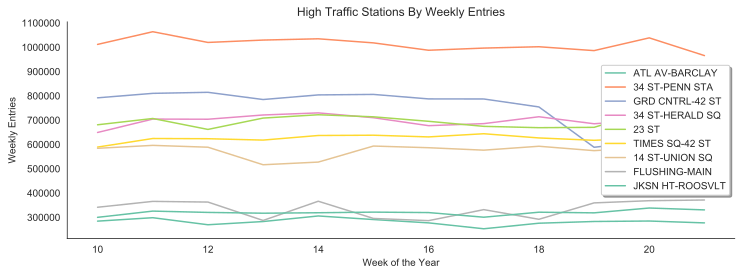

In [1078]:
plt.figure(figsize=(12,4))

for sta in all_top_sta:
    single_station = grouped_by_station_and_week[grouped_by_station_and_week.station == sta]
    time_plot = sns.lineplot(x=single_station.week[1:-1], y = single_station.weekly_entries, label=sta);
    
time_plot.legend(loc=0, fontsize='10', shadow=True);
time_plot.set_title('High Traffic Stations By Weekly Entries')
time_plot.set_ylabel('Weekly Entries')
time_plot.set_xlabel('Week of the Year');
sf=ScalarFormatter()
sf.set_scientific(True)
time_plot.yaxis.set_major_formatter(sf)
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");
plt.savefig("Determing_high_traffic_stations_by_weekly_traffic.png")

# GRAPH TO USE BELOW

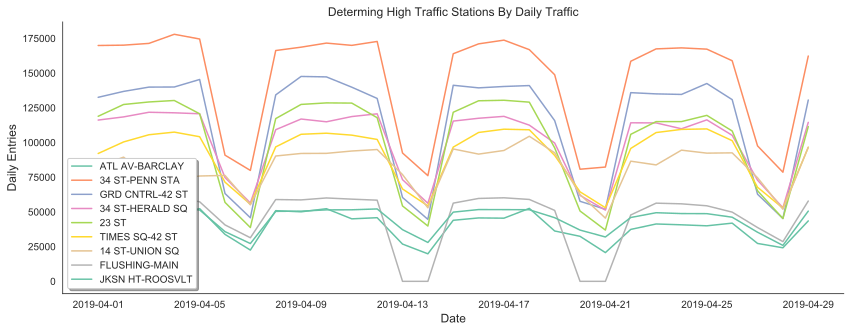

In [1178]:
grouped_by_station_and_day = mta_daily.groupby(['station', mta_daily.datetime.dt.date])['daily_entries'].agg([np.sum])
grouped_by_station_and_day = grouped_by_station_and_day.reset_index().rename(columns={'sum': 'daily_entries', 'datetime': 'date'})

plt.figure(figsize=(14,5))

for sta in all_top_sta:
    single_station = grouped_by_station_and_day[grouped_by_station_and_day.station == sta]
    ss_boundary = single_station[(single_station.date >= pd.to_datetime('2019-04-1').date()) & (single_station.date <= pd.to_datetime('2019-04-29').date())]
    time_plot = sns.lineplot(x=ss_boundary.date, y = ss_boundary.daily_entries, label=sta);
    
time_plot.legend(loc=3, fontsize='10', shadow=True);
time_plot.set_title('Determing High Traffic Stations By Daily Traffic', fontsize=12)
time_plot.set_ylabel('Daily Entries', fontsize=12)
time_plot.set_xlabel('Date', fontsize=12);
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");
plt.savefig("Apr_Determing_high_traffic_stations_by_daily_traffic.png")

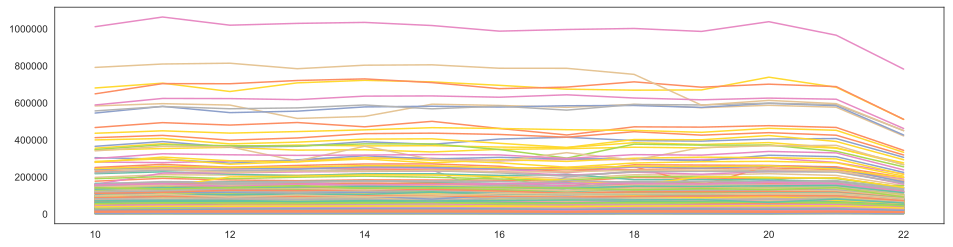

In [1081]:
#these ones are for display purposes but won't actaully be used
plt.figure(figsize=(16,4))

unique_stations = grouped_by_station_and_week.station.unique()
for sta in unique_stations:
    single_station = grouped_by_station_and_week[grouped_by_station_and_week.station == sta].groupby(["week"])['weekly_entries'].agg(['max'])
    plt.plot(single_station[1:]);

    
plt.savefig("traffic_by_stn_all_stn_weekly.png")

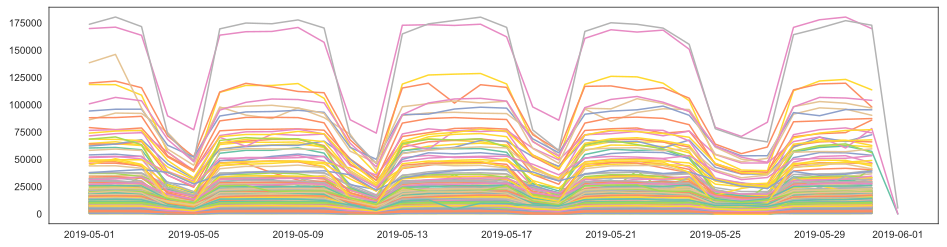

In [1082]:
grouped_by_station_and_day = mta_daily.groupby(['station', mta_daily.datetime.dt.date])['daily_entries'].agg([np.sum])
grouped_by_station_and_day = grouped_by_station_and_day.reset_index().rename(columns={'sum': 'daily_entries', 'datetime': 'date'})

plt.figure(figsize=(16,4))

for sta in unique_stations:
    single_station = grouped_by_station_and_day[grouped_by_station_and_day.station == sta].groupby(["date"])['daily_entries'].agg(['max'])
    plt.plot(single_station[single_station.index >= pd.to_datetime('2019-05-01').date()]);
    
plt.savefig("traffic_by_stn_all_stn_daily.png")

In [744]:
grp_sta_day_mean = grouped_by_station_and_day.groupby('station')['daily_entries'].agg(['mean'])
grp_sta_day_mean = grp_sta_day_mean.sort_values(by='mean', ascending=False)[:10]
grp_sta_day_mean

#rather than filtering by top ten, we will do by borough and then by top 5 and graph all of them

,mean
station,
34 ST-PENN STA,143741.478261
GRD CNTRL-42 ST,104478.206522
34 ST-HERALD SQ,98663.750000
23 ST,98322.163043
TIMES SQ-42 ST,88560.326087
FULTON ST,82232.565217
42 ST-PORT AUTH,81765.032609
14 ST-UNION SQ,81518.771739
86 ST,72318.630435


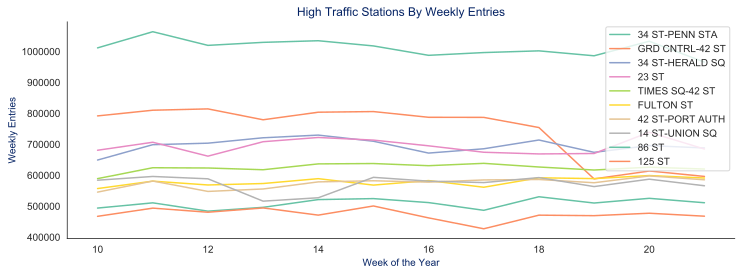

In [310]:
top_ten_stations = grp_sta_wk_mean.index.unique()

plt.figure(figsize=(12,4))

for sta in top_ten_stations:
    single_station = grouped_by_station_and_week[grouped_by_station_and_week.station == sta]#.groupby(["week"])['weekly_entries'].agg(['max'])
    time_plot = sns.lineplot(x=single_station.week[1:-1], y = single_station.weekly_entries[1:-1], label=sta);
    #plt.plot(single_station[1:-1], label=sta)
    
plt.legend(loc=1);
time_plot.legend(loc=1, fontsize='10');
time_plot.set_title('High Traffic Stations By Weekly Entries')
time_plot.set_ylabel('Weekly Entries')
time_plot.set_xlabel('Week of the Year');
sf=ScalarFormatter()
sf.set_scientific(True)
time_plot.yaxis.set_major_formatter(sf)
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");

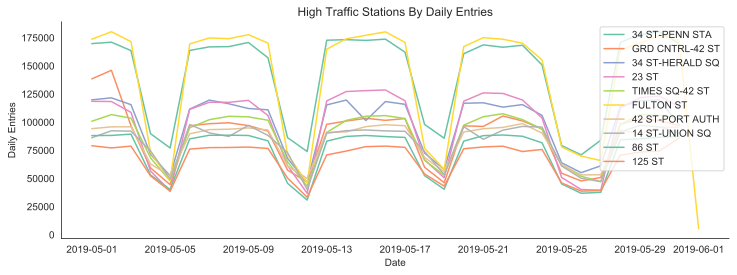

In [1073]:
plt.figure(figsize=(12,4))
brand_blue = '#042263FF'
for sta in top_ten_stations:
    single_station = grouped_by_station_and_day[grouped_by_station_and_day.station == sta]#.groupby(["date"])['daily_entries'].agg(['max'])
    ss_boundary = single_station[single_station.date >= pd.to_datetime('2019-05-01').date()]
    time_plot = sns.lineplot(x=ss_boundary.date, y = ss_boundary.daily_entries, label=sta);
    
time_plot.legend(loc=1, fontsize='10');
time_plot.set_title('High Traffic Stations By Daily Entries')
time_plot.set_ylabel('Daily Entries')
time_plot.set_xlabel('Date');
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");

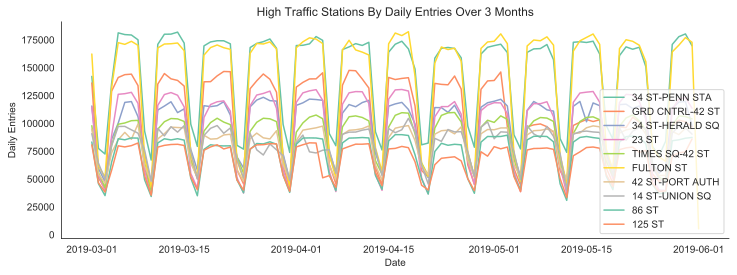

In [1160]:
plt.figure(figsize=(12,4))
brand_blue = '#042263FF'
for sta in top_ten_stations:
    single_station = grouped_by_station_and_day[grouped_by_station_and_day.station == sta]#.groupby(["date"])['daily_entries'].agg(['max'])
    #ss_boundary = single_station[single_station.date >= pd.to_datetime('2019-05-01').date()]
    time_plot = sns.lineplot(x=single_station.date, y = single_station.daily_entries, label=sta);
    
time_plot.legend(loc=4, fontsize='10');
time_plot.set_title('High Traffic Stations By Daily Entries Over 3 Months')
time_plot.set_ylabel('Daily Entries')
time_plot.set_xlabel('Date');
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");
plt.savefig("High Traffic Stations Over Three Months.png")

**NEED TO SET Y AXIS ON ABOVE TO SCIENTIFIC**

# Within our top stations, what is the best day to get signups? 

In [816]:
#Will replace this with the final stations that we choose rather than top ten stations

# Take the top stations and figure out when their highest traffic days are over the three months before the gala. 
# Consider: day of week & any holiday spikes
all_top_sta

['ATL AV-BARCLAY',
 '34 ST-PENN STA ',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 'FLUSHING-MAIN ',
 'JKSN HT-ROOSVLT']

In [1134]:
#create a new column for the day of week
mta_daily['dow'] = mta_daily.datetime.dt.dayofweek
mta_daily

,c_a,unit,scp,station,borough,datetime,entries,daily_entries,dow
0,A002,R051,02-00-00,59 ST,Bk,2019-03-01,6962094,1528.0,4
1,A002,R051,02-00-00,59 ST,Bk,2019-03-02,6963622,741.0,5
2,A002,R051,02-00-00,59 ST,Bk,2019-03-03,6964363,541.0,6
3,A002,R051,02-00-00,59 ST,Bk,2019-03-04,6964904,1239.0,0
4,A002,R051,02-00-00,59 ST,Bk,2019-03-05,6966143,1481.0,1
...,...,...,...,...,...,...,...,...,...
412749,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-27,539645843,412.0,0
412750,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-28,539646255,1220.0,1
412751,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-29,539647475,1287.0,2
412752,R730,R431,00-00-03,EASTCHSTER/DYRE,Bx,2019-05-30,539648762,1307.0,3


In [1136]:
x1, x2, x3, x4, x5, x6, x7, x8, x9 = all_top_sta
all_top_sta_grp_by_sta_dow = mta_daily[(mta_daily.station == x1) | 
                                       (mta_daily.station == x2) | 
                                       (mta_daily.station == x3) |
                                       (mta_daily.station == x4) |
                                       (mta_daily.station == x5) |
                                       (mta_daily.station == x6) |
                                       (mta_daily.station == x7) |
                                       (mta_daily.station == x8) |
                                       (mta_daily.station == x9)
                                      ]
grp_by_sta_dow = mta_daily.groupby(['station', 'dow'])['daily_entries'].agg([np.mean]).reset_index()
grp_by_sta_dow = grp_by_sta_dow.rename(columns={'mean': 'mean_dow_entries'})

In [1075]:
all_top_sta

['ATL AV-BARCLAY',
 '34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 'FLUSHING-MAIN',
 'JKSN HT-ROOSVLT']

# GRAPH TO USE BELOW

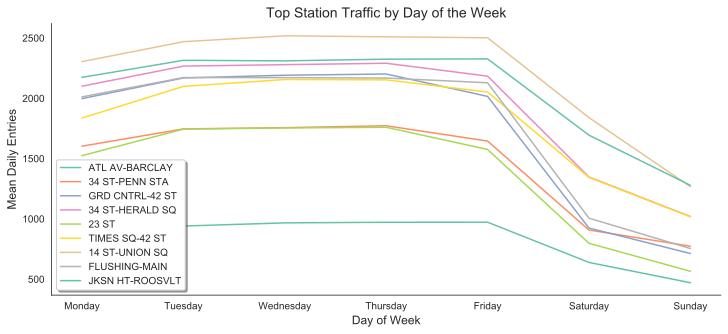

In [1155]:
plt.figure(figsize=(12,5))

days = ['','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for sta in all_top_sta:
    single_station = grp_by_sta_dow[grp_by_sta_dow.station == sta]
    dow_plot = sns.lineplot(x=single_station.dow, y = single_station.mean_dow_entries, label=sta);
    
dow_plot.legend(fontsize='10', shadow=True, loc=3);
dow_plot.set_title('Top Station Traffic by Day of the Week', fontsize=14)
dow_plot.set_ylabel('Mean Daily Entries', fontsize=12)
dow_plot.set_xlabel('Day of Week', fontsize=12);
dow_plot.set_xticklabels(labels=days)

sns.despine()
sns.set_style('white')
sns.set_palette("Set2");
plt.savefig("Top_station_traffic_by_day_of_week.png")

# Within our top stations, what is the best time of day to get signups? 

In [979]:
#mta_hourly.datetime = pd.to_datetime(mta.date,format="%m/%d/%Y %H:%M:%S")

In [980]:
x1, x2, x3, x4, x5, x6, x7, x8, x9 = all_top_sta
all_days_top_sta = mta_hourly[(mta_hourly.station == x1)| 
                              (mta_daily.station == x2) | 
                              (mta_daily.station == x3) |
                              (mta_daily.station == x4) |
                              (mta_daily.station == x5) |
                              (mta_daily.station == x6) |
                              (mta_daily.station == x7) |
                              (mta_daily.station == x8) |
                              (mta_daily.station == x9)]   

all_days_top_sta

/Users/mollyliebeskind/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,c_a,unit,scp,station,datetime,entries,y_entries,hourly_entries,dow
5668,A002,R051,02-05-00,59 ST,2019-05-30 08:00:00,129,129.0,0.0,Thursday
5669,A002,R051,02-05-00,59 ST,2019-05-30 12:00:00,130,129.0,1.0,Thursday
5670,A002,R051,02-05-00,59 ST,2019-05-30 16:00:00,130,130.0,0.0,Thursday
5671,A002,R051,02-05-00,59 ST,2019-05-30 20:00:00,130,130.0,0.0,Thursday
5672,A002,R051,02-05-00,59 ST,2019-05-31 00:00:00,130,130.0,0.0,Friday
...,...,...,...,...,...,...,...,...,...
2351878,R612,R057,01-05-01,ATL AV-BARCLAY,2019-06-01 04:00:00,117440512,117440512.0,0.0,Saturday
2351879,R612,R057,01-05-01,ATL AV-BARCLAY,2019-06-01 08:00:00,117440512,117440512.0,0.0,Saturday
2351880,R612,R057,01-05-01,ATL AV-BARCLAY,2019-06-01 12:00:00,117440512,117440512.0,0.0,Saturday
2351881,R612,R057,01-05-01,ATL AV-BARCLAY,2019-06-01 16:00:00,117440512,117440512.0,0.0,Saturday


In [983]:
all_days_top_sta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63111 entries, 5668 to 2351882
Data columns (total 9 columns):
c_a               63111 non-null object
unit              63111 non-null object
scp               63111 non-null object
station           63111 non-null object
datetime          63111 non-null datetime64[ns]
entries           63111 non-null int64
y_entries         63111 non-null float64
hourly_entries    63111 non-null float64
dow               63111 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 4.8+ MB


In [1107]:
hourly_dow

,dow,datetime,hourly_mean
0,Friday,0,100.722753
1,Friday,1,25.253275
2,Friday,2,61.720430
3,Friday,3,28.168675
4,Friday,4,11.484536
...,...,...,...
163,Wednesday,19,230.382716
164,Wednesday,20,216.308219
165,Wednesday,21,201.146119
166,Wednesday,22,395.938144


In [1115]:
hourly_dow = all_days_top_sta.groupby(['dow', all_days_top_sta.datetime.dt.hour])['hourly_entries'].agg(['mean']).reset_index()
hourly_dow = hourly_dow.rename(columns={'mean':'hourly_mean'})
def define_hour_groups(data):
    for row in data.index:
        print(row)
        if data.loc[row, 'datetime'] == 0:
            data.loc[row, 'hour_group'] = 0
        elif 0 < data.loc[row, 'datetime'] <= 3:
            data.loc[row, 'hour_group'] = 3
        elif 3 < data.loc[row, 'datetime']  <= 6:
            data.loc[row, 'hour_group'] = 6
        elif 6 < data.loc[row, 'datetime']  <= 9:
            data.loc[row, 'hour_group'] = 9
        elif 9 < data.loc[row, 'datetime']  <= 12:
            data.loc[row, 'hour_group'] = 12
        elif 12 < data.loc[row, 'datetime'] <= 15:
            data.loc[row, 'hour_group'] = 15
        elif 15 < data.loc[row, 'datetime']  <= 18:
            data.loc[row, 'hour_group'] = 18
        elif 18 < data.loc[row, 'datetime'] <= 21:
            data.loc[row, 'hour_group'] = 21
        elif 21 < data.loc[row, 'datetime'] <= 24:
            data.loc[row, 'hour_group'] = 24
    return data

hourly_dow = define_hour_groups(hourly_dow)
hourly_dow

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


,dow,datetime,hourly_mean,hour_group
0,Friday,0,100.722753,0.0
1,Friday,1,25.253275,3.0
2,Friday,2,61.720430,3.0
3,Friday,3,28.168675,3.0
4,Friday,4,11.484536,6.0
...,...,...,...,...
163,Wednesday,19,230.382716,21.0
164,Wednesday,20,216.308219,21.0
165,Wednesday,21,201.146119,21.0
166,Wednesday,22,395.938144,24.0


In [1121]:
grp_hourly_dow = hourly_dow.groupby(['dow', 'hour_group'])['hourly_mean'].agg(['sum']).reset_index()
grp_hourly_dow = grp_hourly_dow.rename(columns = {'sum': 'entries_per_hour_group'})
grp_hourly_dow

,dow,hour_group,entries_per_hour_group
0,Friday,0.0,100.722753
1,Friday,3.0,115.142380
2,Friday,6.0,16.616909
3,Friday,9.0,233.957251
4,Friday,12.0,532.087872
...,...,...,...
58,Wednesday,12.0,456.836651
59,Wednesday,15.0,382.555274
60,Wednesday,18.0,888.539568
61,Wednesday,21.0,647.837054


# GRAPH TO USE BELOW

In [1185]:
plt.figure(figsize=(10,4))

days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday']
for day in days:
    single_day = hourly_dow[hourly_dow.dow == day]
    dow_time_plot = sns.lineplot(x=single_day.hour_group, y = single_day.entries_per_hour_group, label=day);

dow_time_plot.legend(fontsize='10')
dow_time_plot.set_title('Station Traffic By Hour', fontsize=12)
dow_time_plot.set_ylabel('Mean Hourly Entries', fontsize=12)
dow_time_plot.set_xlabel('Hour of The Day', fontsize=12)
lab = list(range(0,24))
lab = str(lab)
dow_time_plot.set_xticklabels(labels=lab)

sns.despine()
sns.set_style('white')
sns.set_palette("Set2");

plt.savefig("Peak_Days_Line_Station_Traffic_By_Hour.png")

AttributeError: 'DataFrame' object has no attribute 'entries_per_hour_group'

<Figure size 720x288 with 0 Axes>

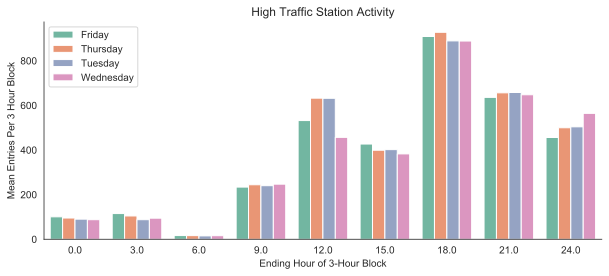

In [1180]:
days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday']
peak_days = grp_hourly_dow[(grp_hourly_dow.dow == 'Tuesday') |
                       (grp_hourly_dow.dow == 'Wednesday') | 
                       (grp_hourly_dow.dow == 'Thursday') | 
                       (grp_hourly_dow.dow == 'Friday')  
                      ]
plt.figure(figsize=(10,4))
bar_time = sns.barplot(x=peak_days.hour_group, y = peak_days.entries_per_hour_group, hue=peak_days.dow);


bar_time.legend(fontsize='10', loc=2)
bar_time.set_title('High Traffic Station Activity')
bar_time.set_ylabel('Mean Entries Per 3 Hour Block')
bar_time.set_xlabel('Ending Hour of 3-Hour Block')
plt.savefig("Station_Traffic_By_Hour.png")
sns.despine()

plt.savefig("Peak_days_Station_Traffic_By_Hour.png")


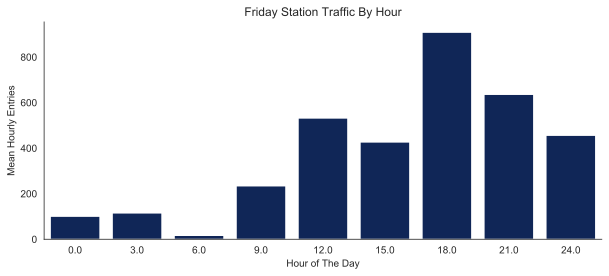

In [1182]:
single_day = grp_hourly_dow[(grp_hourly_dow.dow == 'Friday')]
plt.figure(figsize=(10,4))
bar_time = sns.barplot(x=single_day.hour_group, y = single_day.entries_per_hour_group, color='#042263FF');


bar_time.set_title('Friday Station Traffic By Hour')
bar_time.set_ylabel('Mean Hourly Entries')
bar_time.set_xlabel('Hour of The Day')
sns.despine()
plt.savefig("Friday_Station_Traffic_By_Hour.png")

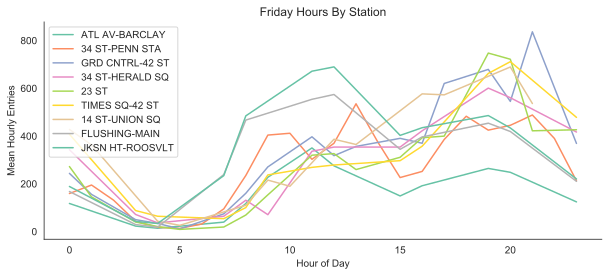

In [1183]:
plt.figure(figsize=(10,4))

for sta in all_top_sta:
    single_station = thursday_hours[thursday_hours.station == sta]
    hour = single_station['datetime']
    dow_time_plot = sns.lineplot(x=hour, y = single_station.hourly_mean, label=sta, estimator=None);

dow_time_plot.legend(fontsize='10')
dow_time_plot.set_title('Friday Hours By Station')
dow_time_plot.set_ylabel('Mean Hourly Entries')
dow_time_plot.set_xlabel('Hour of Day')

sns.despine()
sns.set_style('white')
sns.set_palette("Set2");
plt.savefig("Friday_Station_Traffic_all_stations.png")

In [ ]:
dow_time_plot.legend(fontsize='10');
dow_time_plot.set_title('Traffic by Day of Week For Key Stations')
dow_time_plot.set_ylabel('Mean Daily Entries')
dow_time_plot.set_xlabel('Day of Week');

sns.despine()
sns.set_style('white')
sns.set_palette("Set2");